# Customer Segementation

In [2]:
!kaggle datasets download -d yasserh/customer-segmentation-dataset
!unzip customer-segmentation-dataset.zip -d /content/data


Dataset URL: https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset
License(s): CC0-1.0
 92% 20.0M/21.8M [00:01<00:00, 30.1MB/s]
100% 21.8M/21.8M [00:01<00:00, 19.9MB/s]
Archive:  customer-segmentation-dataset.zip
  inflating: /content/data/Online Retail.xlsx  


In [3]:
import pandas as pd

df = pd.read_excel("/content/data/Online Retail.xlsx")
df.head()   # Display first few rows


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Convert InvoiceDate to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Remove missing Customer IDs
df = df.dropna(subset=["CustomerID"])

# Remove negative quantities (returns)
df = df[df["Quantity"] > 0]

# Create Total Spent Column
df["TotalSpent"] = df["Quantity"] * df["UnitPrice"]

# Get latest purchase date for recency calculation
latest_date = df["InvoiceDate"].max()

# Aggregate customer data
customer_data = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",  # Frequency (Unique purchases)
    "TotalSpent": "sum",  # Total spending
    "Quantity": "sum"  # Total quantity purchased
}).rename(columns={"InvoiceDate": "Recency", "InvoiceNo": "Frequency"})

# Define Customer Segments
def segment_customers(row):
    if row["Frequency"] > 50 and row["TotalSpent"] > 5000:
        return "Loyal Customers"
    elif row["TotalSpent"] > 5000:
        return "Big Spenders"
    elif row["Frequency"] > 20:
        return "Casual Shoppers"
    elif row["Recency"] > 180:
        return "Lost Customers"
    elif row["TotalSpent"] < 100:
        return "Bargain Hunters"
    elif row["Frequency"] == 1:
        return "One-Time Buyers"
    else:
        return "General Customers"

# Apply segmentation
customer_data["Segment"] = customer_data.apply(segment_customers, axis=1)

# Save the results
customer_data.to_csv("Customer_Segments_Human_Readable.csv")

print("Customer segmentation completed successfully!")

Customer segmentation completed successfully!


In [6]:
import pandas as pd

# Load the segmented customer data
df = pd.read_csv("/content/Customer_Segments_Human_Readable.csv" )

# Check the first few rows
print(df.head())


   CustomerID  Recency  Frequency  TotalSpent  Quantity            Segment
0     12346.0      325          1    77183.60     74215       Big Spenders
1     12347.0        1          7     4310.00      2458  General Customers
2     12348.0       74          4     1797.24      2341  General Customers
3     12349.0       18          1     1757.55       631    One-Time Buyers
4     12350.0      309          1      334.40       197     Lost Customers


# Bar Plot

<ipython-input-7-a3a4eea3e4b4>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")


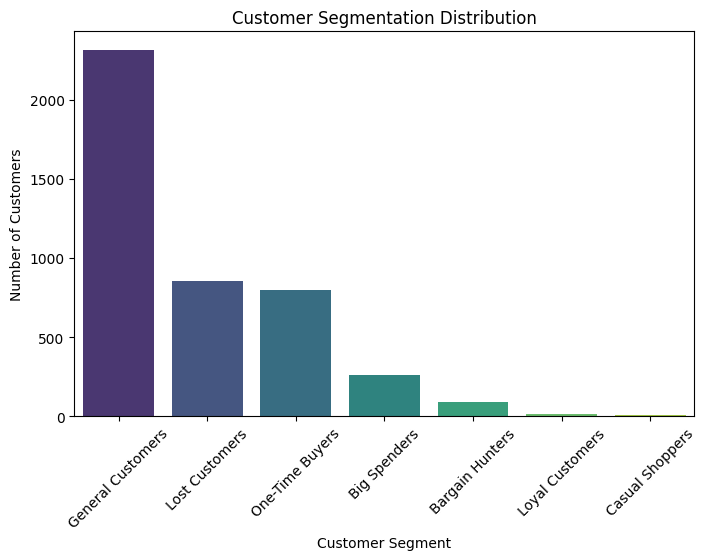

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count customers in each segment
segment_counts = df["Segment"].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Customer Segmentation Distribution")
plt.show()


# Scatter Plot

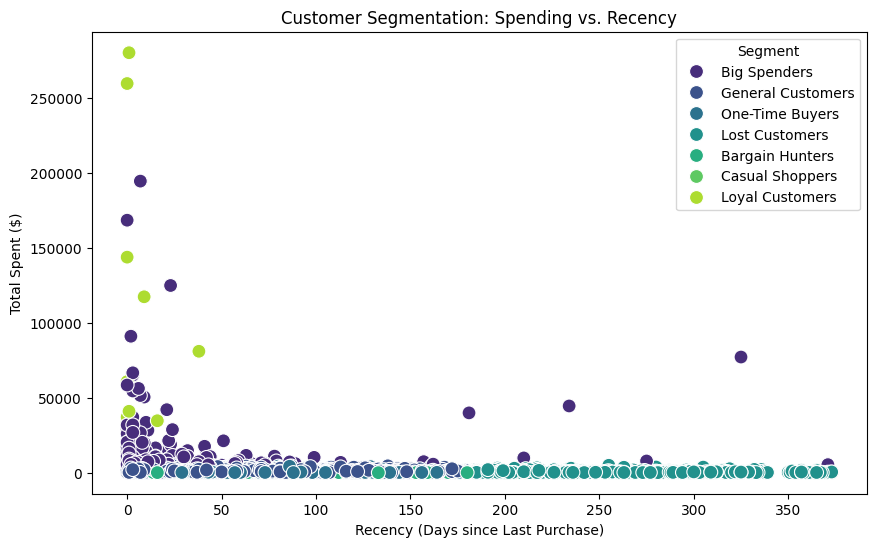

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Recency", y="TotalSpent", hue="Segment", palette="viridis", s=100)
plt.xlabel("Recency (Days since Last Purchase)")
plt.ylabel("Total Spent ($)")
plt.title("Customer Segmentation: Spending vs. Recency")
plt.legend(title="Segment")
plt.show()


# Pie Chart

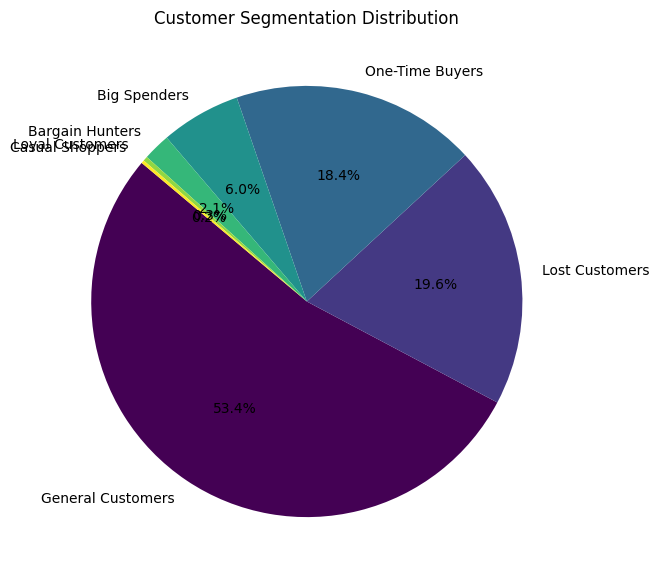

In [9]:
plt.figure(figsize=(7, 7))
df["Segment"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="viridis", startangle=140)
plt.ylabel("")
plt.title("Customer Segmentation Distribution")
plt.show()
